In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
interval = '0.001H' # Точечный
# interval = '1H'

In [3]:
df = pd.read_csv('metrics_collector.tsv', sep='\t', header=None)

C:\Users\ggaa3\AppData\Local\Temp\ipykernel_10196\750769984.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metrics_collector.tsv', sep='\t', header=None)


In [4]:
df.columns = ['account_id', 'name', 'point', 'call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances', 'language', 'app_name', 'app_id', 'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels']

In [5]:
df[df['name'] == 'Errors/allWeb']

,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,language,app_name,app_id,scope,host,display_host,pid,agent_version,labels
1304573,1,Errors/allWeb,2024-05-12 01:23:00,1.0,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1304574,1,Errors/allWeb,2024-05-12 01:24:00,1.5,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1304575,1,Errors/allWeb,2024-05-12 01:25:00,1.5,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1304576,1,Errors/allWeb,2024-05-12 01:26:00,1.0,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1304577,1,Errors/allWeb,2024-05-12 01:27:00,2.0,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18337651,1,Errors/allWeb,2024-05-16 00:36:00,1.0,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18337652,1,Errors/allWeb,2024-05-16 00:37:00,4.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18337653,1,Errors/allWeb,2024-05-16 00:38:00,3.0,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18337654,1,Errors/allWeb,2024-05-16 00:42:00,0.5,0.0,0.0,0.0,0.0,0.0,0.5,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}


In [6]:
df_metrics = pd.DataFrame()

In [7]:
df_cr = df.copy()

In [8]:
df_WR = df_cr[['point','total_call_time','call_count']][(df_cr['language'] == 'java') &(df_cr['app_name'] == '[GMonit] Collector') & (df_cr['scope'].isnull()) & (df_cr['name'] == 'HttpDispatcher')]

In [9]:
df_webr = df_WR.groupby('point').agg({
    'total_call_time': lambda x: np.nan if x.isna().all() else x.sum(),
    'call_count': lambda x: np.nan if x.isna().all() else x.sum()
}).reset_index()
df_webr['y'] = df_webr['total_call_time'] / df_webr['call_count']

In [10]:
df_webr['webr_y'] = df_webr['y'] * 1000
df_webr['point'] = pd.to_datetime(df_webr['point'])
df_webr.set_index('point', inplace=True)
grouped_webr = df_webr.groupby(pd.Grouper(freq=interval)).mean().reset_index()
grouped_webr = grouped_webr[['point', 'webr_y']]


C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Задержка (ms)')

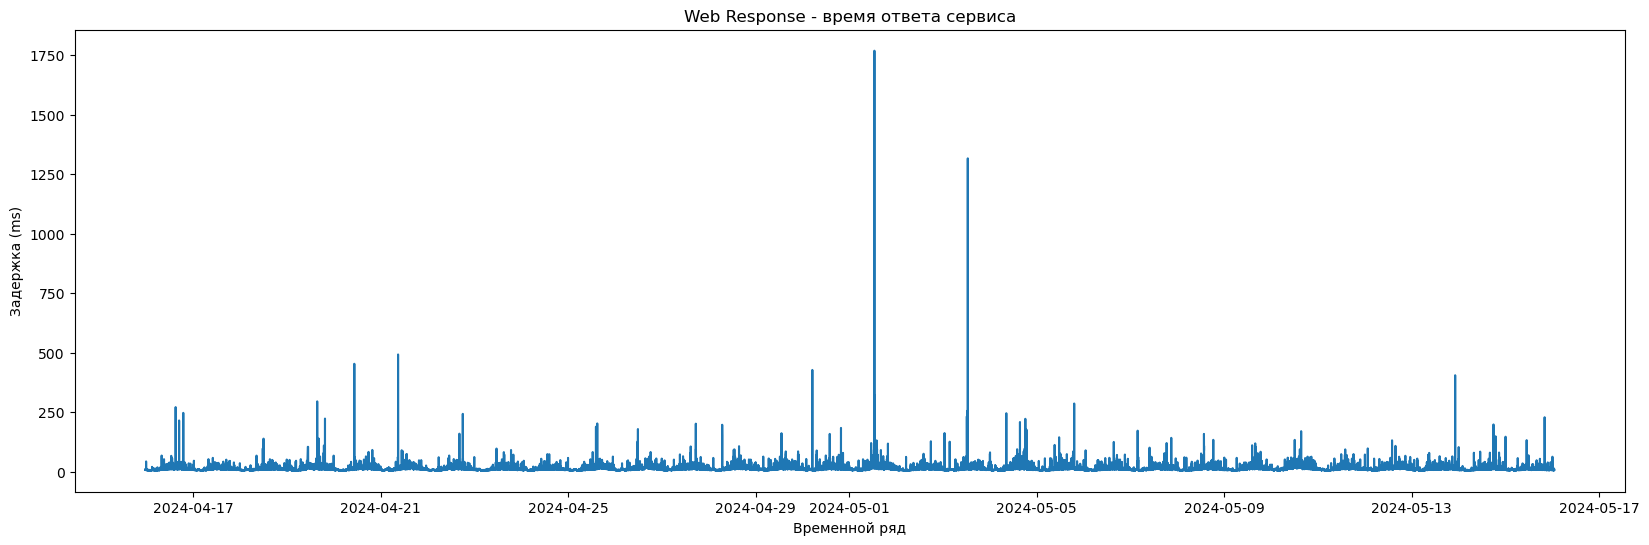

In [11]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='point', y='webr_y', data=grouped_webr[['point','webr_y']])
plt.title('Web Response - время ответа сервиса')
plt.xlabel('Временной ряд')
plt.ylabel('Задержка (ms)')

In [12]:
df_T = df_cr[['point', 'call_count']][(df_cr['language'] == 'java') &(df_cr['app_name'] == '[GMonit] Collector') & (df_cr['scope'].isnull()) & (df_cr['name'] == 'HttpDispatcher')].fillna(0)

In [13]:
df_Tr = df_T.groupby('point').agg({
    'call_count': lambda x: np.nan if x.isna().all() else x.sum()
}).reset_index()


In [14]:
df_Tr['point'] = pd.to_datetime(df_Tr['point'])
df_Tr.set_index('point', inplace=True)
df_Tr['Tr_y'] = df_Tr['call_count']

grouped_Tr = df_Tr.groupby(pd.Grouper(freq=interval)).mean().reset_index() 
grouped_Tr = grouped_Tr[['point', 'Tr_y']]

C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'RPM (запросы в минуту)')

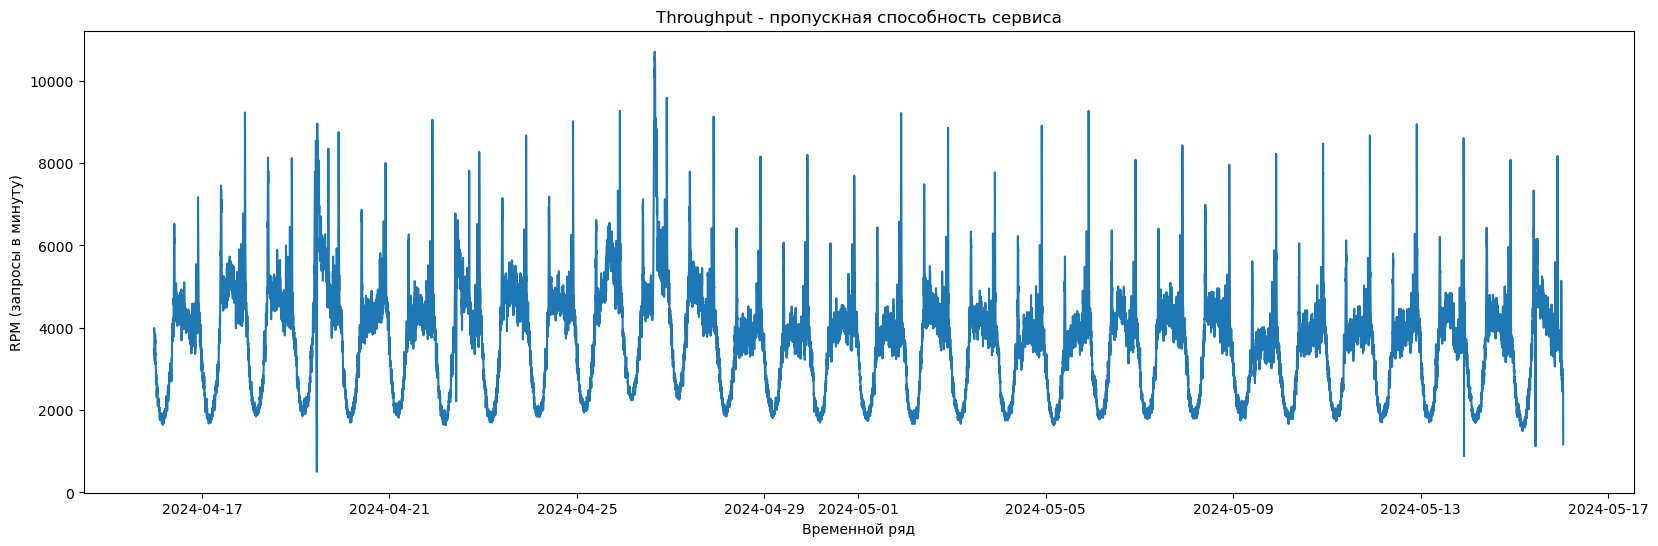

In [15]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='point', y='Tr_y', data=grouped_Tr[['point','Tr_y']])
plt.title('Throughput - пропускная способность сервиса')
plt.xlabel('Временной ряд')
plt.ylabel('RPM (запросы в минуту)')

In [16]:
df_A = df_cr[['point', 'call_count', 'total_call_time', 'total_exclusive_time']][(df_cr['language'] == 'java') &(df_cr['app_name'] == '[GMonit] Collector') & (df_cr['scope'].isnull()) & (df_cr['name'] == 'Apdex')].fillna(0)

In [17]:
df_Ar = df_A.groupby('point').agg({
    'total_exclusive_time': lambda x: np.nan if x.isna().all() else x.sum(),
    'total_call_time': lambda x: np.nan if x.isna().all() else x.sum(),
    'call_count': lambda x: np.nan if x.isna().all() else x.sum()
}).reset_index()


In [18]:
df_Ar['Ar_y'] = (df_Ar['call_count'] + df_Ar['total_call_time']/2)/(df_Ar['call_count'] + df_Ar['total_call_time'] + df_Ar['total_exclusive_time'])
df_Ar['point'] = pd.to_datetime(df_Ar['point'])
df_Ar.set_index('point', inplace=True)

grouped_Ar = df_Ar.groupby(pd.Grouper(freq=interval)).max().reset_index()
grouped_Ar = grouped_Ar[['point', 'Ar_y']]

C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Показатель здоровья')

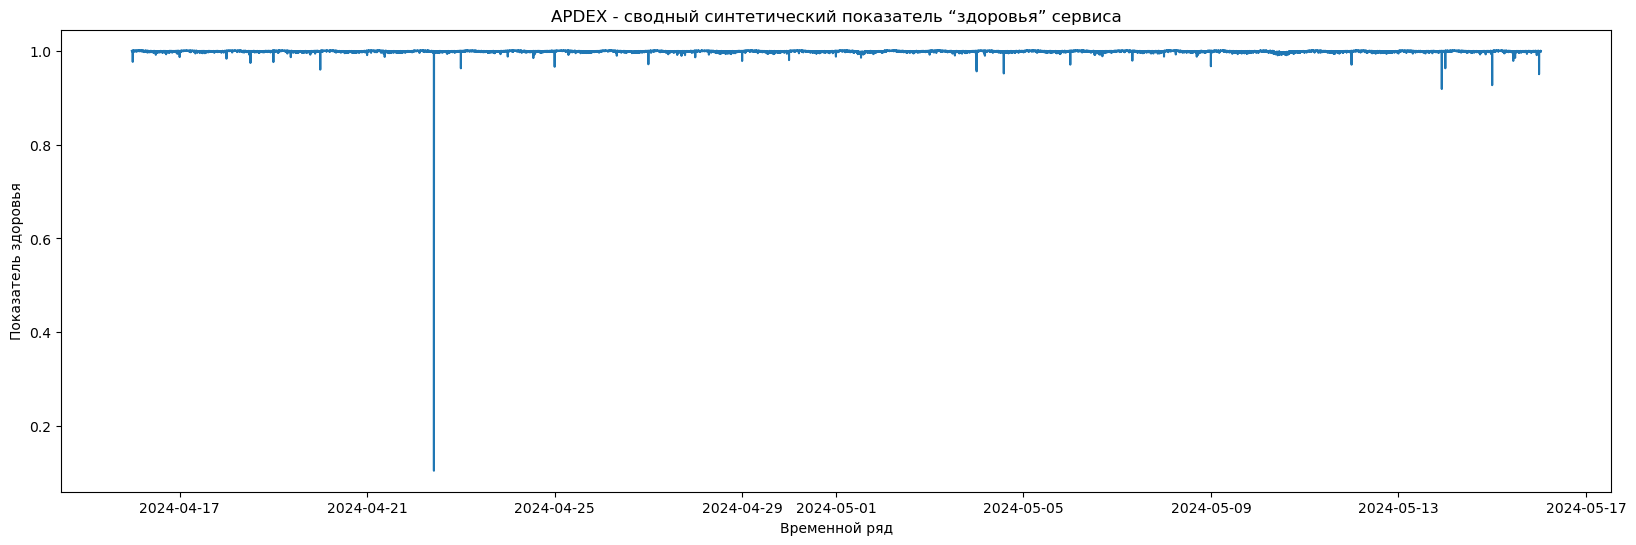

In [19]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='point', y='Ar_y', data=grouped_Ar[['point','Ar_y']])
plt.title('APDEX - сводный синтетический показатель “здоровья” сервиса')
plt.xlabel('Временной ряд')
plt.ylabel('Показатель здоровья')

In [20]:
df_E = df_cr[['point', 'call_count', 'total_call_time', 'name']][(df_cr['language'] == 'java') &(df_cr['app_name'] == '[GMonit] Collector') & (df_cr['scope'].isnull()) & (df_cr['name'].isin(['HttpDispatcher', 'Errors/allWeb']))].fillna(0)

In [21]:
def sum_or_null_if(df, condition):
    filtered = df[condition]
    if filtered['call_count'].isna().all():
        return np.nan
    return filtered['call_count'].sum()

grouped = df_E.groupby('point')

results = grouped.apply(lambda x: pd.Series({
    ' ': sum_or_null_if(x, x['name'] == 'Errors/allWeb') / sum_or_null_if(x, x['name'] == 'HttpDispatcher')
}))
results

,
point,
2024-04-15 23:32:00,0.000128
2024-04-15 23:33:00,0.000128
2024-04-15 23:34:00,NaN
2024-04-15 23:35:00,NaN
2024-04-15 23:36:00,NaN
...,...
2024-05-16 00:54:00,NaN
2024-05-16 00:55:00,NaN
2024-05-16 00:56:00,0.000206


In [22]:
df_Er = results.copy()

In [23]:
df_Er = df_Er.reset_index()
df_Er[['point', 'Er_y']] = df_Er
df_Er = df_Er[['point', 'Er_y']]
df_Er['point'] = pd.to_datetime(df_Er['point'])
df_Er.set_index('point', inplace=True)

In [24]:
grouped_Er = df_Er.groupby(pd.Grouper(freq=interval)).mean().reset_index() 
grouped_Er = grouped_Er[['point', 'Er_y']]

C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Процент ошибок')

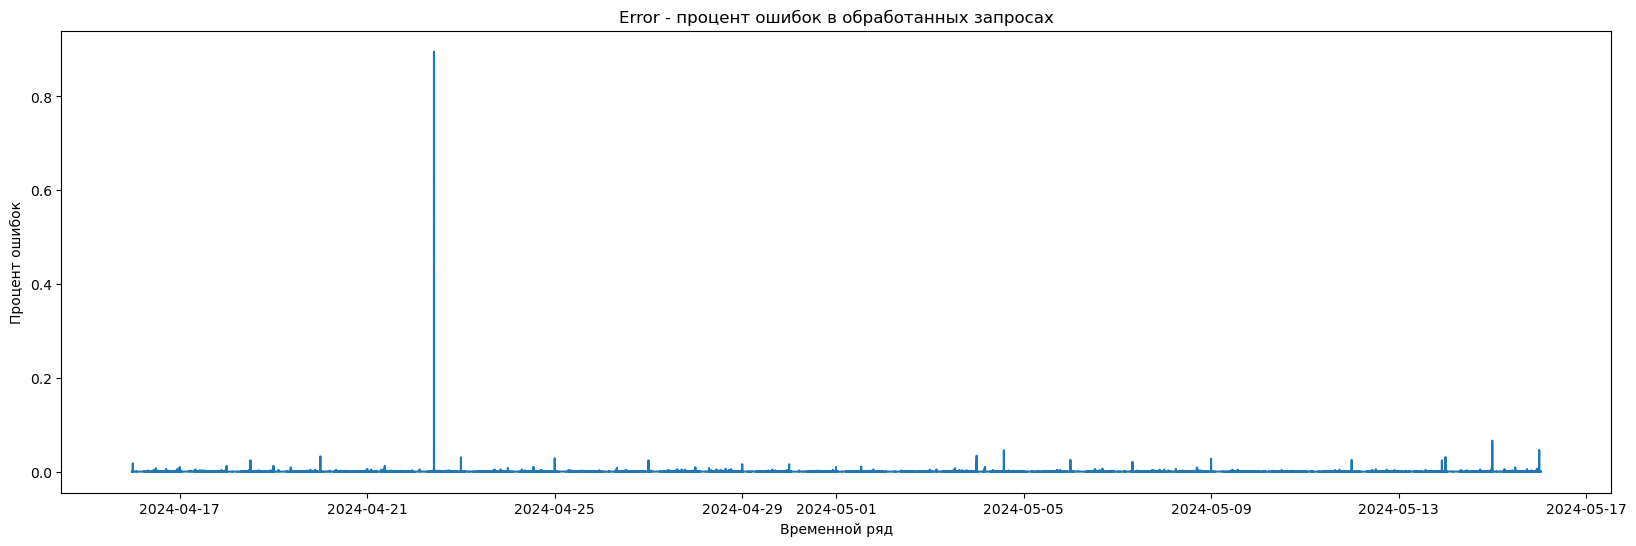

In [25]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='point', y='Er_y', data=grouped_Er[['point','Er_y']])
plt.title('Error - процент ошибок в обработанных запросах')
plt.xlabel('Временной ряд')
plt.ylabel('Процент ошибок')

In [26]:
df_metrics = pd.concat(objs=[grouped_webr, grouped_Tr, grouped_Ar, grouped_Er],axis=1)

In [27]:
df_metrics = df_metrics.loc[:, ~df_metrics.columns.duplicated()]
df_metrics

,point,webr_y,Tr_y,Ar_y,Er_y
0,2024-04-15 23:31:58.800,7.721694,3898.0,0.999679,0.000128
1,2024-04-15 23:32:02.400,NaN,NaN,NaN,NaN
2,2024-04-15 23:32:06.000,NaN,NaN,NaN,NaN
3,2024-04-15 23:32:09.600,NaN,NaN,NaN,NaN
4,2024-04-15 23:32:13.200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
721429,2024-05-16 00:57:43.200,NaN,NaN,NaN,NaN
721430,2024-05-16 00:57:46.800,NaN,NaN,NaN,NaN
721431,2024-05-16 00:57:50.400,NaN,NaN,NaN,NaN
721432,2024-05-16 00:57:54.000,NaN,NaN,NaN,NaN


<Axes: >

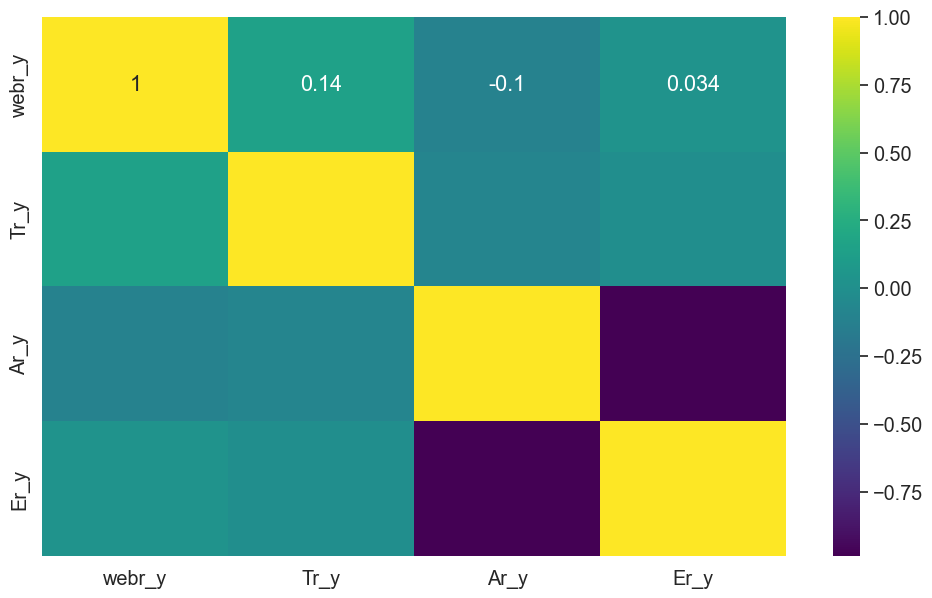

In [28]:
corr_matrix = df_metrics[['webr_y','Tr_y','Ar_y','Er_y']].corr()

sns.set(font_scale=1.3)

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")

C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ggaa3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

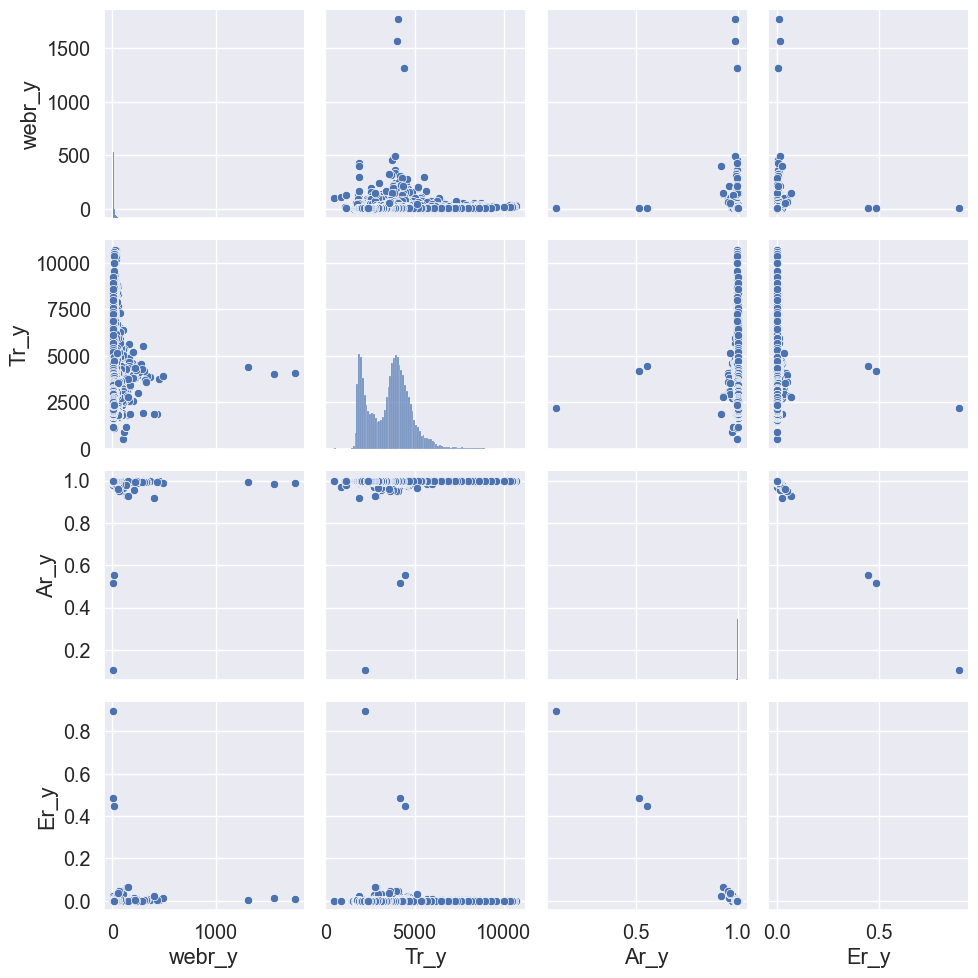

In [29]:
sns.pairplot(df_metrics[['webr_y','Tr_y','Ar_y','Er_y']])